# ------------------CORRECTION FOR STEP 2-----------------
In step 2 while accepting and rejecting hypothesis i was look for correlation not for p value. I calculated p value and added to the step 2.**kalın metin**

#1) Exploring the data:

Data Overview

- The data covers Bitcoin Price and Volume, Ethereum Price and Volume, Bitcoin Popularity Index and Ethereum Popularitiy Index.

- The presence of outliers in data related to financial resources can be attributed to market dynamics, regulative news, or Speculations, which are common in these sectors.

- There are no missing values in the dataset, which simplifies the analysis process as there's no need for imputation or data cleaning related to missing data.

Boxplots for visualization & understanding the data statistics:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the uploaded CSV file
file_path = '/content/drive/MyDrive/Colab Notebooks/cs210/Stock Market Dataset.csv'
data = pd.read_csv(file_path)



In [ ]:
# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Correct formatting for Bitcoin and Ethereum prices (remove commas and convert to float)
data['Bitcoin_Price'] = data['Bitcoin_Price'].str.replace(',', '').astype(float)

# Aggregate Bitcoin prices on a weekly basis using the mean
weekly_data = data['Bitcoin_Price'].resample('W').mean()



# Correct formatting for Ethereum prices (remove commas and convert to float)
data['Ethereum_Price'] = data['Ethereum_Price'].str.replace(',', '').astype(float)

# Aggregate Ethereum prices on a weekly basis using the mean
weekly_ethereum_data = data['Ethereum_Price'].resample('W').mean()

# Filter the Ethereum weekly data starting from April 28, 2019
filtered_weekly_ethereum_data = weekly_ethereum_data[weekly_ethereum_data.index >= "2019-04-28"]




file_path = '/content/drive/MyDrive/Colab Notebooks/cs210/bitcoin_popularity_index.csv'
data_semicolon = pd.read_csv(file_path, delimiter=';')


ethereum_popularity_path = "/content/drive/MyDrive/Colab Notebooks/cs210/ethereum_popul_index.csv"
ethereum_popularity_data = pd.read_csv(ethereum_popularity_path)
# Correctly parsing the CSV file with semicolon as the separator
ethereum_popularity_data = pd.read_csv(ethereum_popularity_path, sep=';')





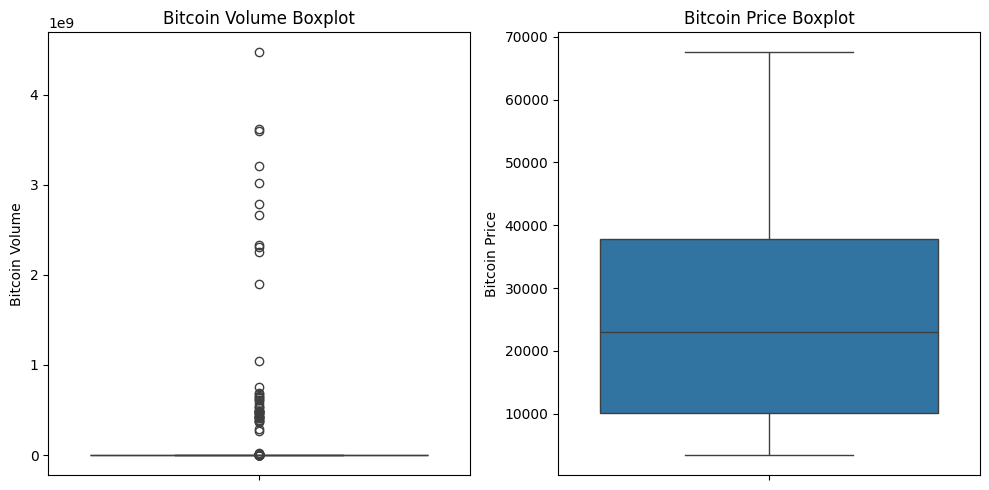

In [ ]:

# Create a figure to host both plots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Using Matplotlib for the first subplot
sns.boxplot(data=data['Bitcoin_Vol.'], ax=axs[0])
axs[0].set_title('Bitcoin Volume Boxplot')
axs[0].set_ylabel('Bitcoin Volume')

# Using Seaborn for the second subplot
sns.boxplot(data=data['Bitcoin_Price'], ax=axs[1])
axs[1].set_title('Bitcoin Price Boxplot')
axs[1].set_ylabel('Bitcoin Price')

# Show plot
plt.tight_layout()
plt.show()

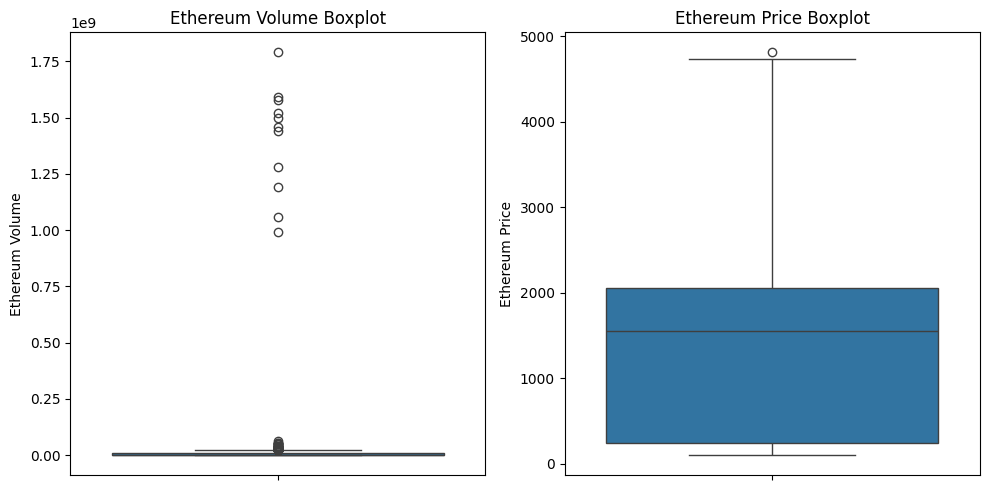

In [ ]:
# Create a figure to host both plots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Using Matplotlib for the first subplot
sns.boxplot(data=data['Ethereum_Vol.'], ax=axs[0])
axs[0].set_title('Ethereum Volume Boxplot')
axs[0].set_ylabel('Ethereum Volume')

# Using Seaborn for the second subplot
sns.boxplot(data=data['Ethereum_Price'], ax=axs[1])
axs[1].set_title('Ethereum Price Boxplot')
axs[1].set_ylabel('Ethereum Price')

# Aggregate Bitcoin prices on a weekly basis using the mean
weekly_data = data['Bitcoin_Price'].resample('W').mean()

# Aggregate Ethereum prices on a weekly basis using the mean
weekly_ethereum_data = data['Ethereum_Price'].resample('W').mean()

# Filter the Ethereum weekly data starting from April 28, 2019
filtered_weekly_ethereum_data = weekly_ethereum_data[weekly_ethereum_data.index >= "2019-04-28"]

# Filter the weekly data starting from April 28, 2019
filtered_weekly_data = weekly_data[weekly_data.index >= "2019-04-28"]

# Combine the Bitcoin and Ethereum weekly data into one DataFrame
combined_weekly_data = pd.DataFrame({
    "Bitcoin_Price": filtered_weekly_data,
    "Ethereum_Price": filtered_weekly_ethereum_data
})

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
import altair as alt
chart = alt.Chart(data_semicolon).mark_boxplot().encode(x='Popularity_Index').properties(width=500)
chart


alt.Chart(...)

In [ ]:
import altair as alt
chart = alt.Chart(ethereum_popularity_data).mark_boxplot().encode(x='Ethereum_popularity_index').properties(width=500)
chart


alt.Chart(...)

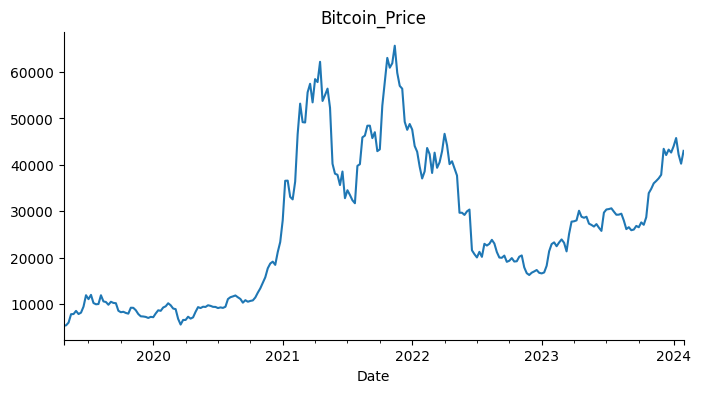

In [ ]:
# @title Bitcoin_Price

from matplotlib import pyplot as plt
combined_weekly_data['Bitcoin_Price'].plot(kind='line', figsize=(8, 4), title='Bitcoin_Price')
plt.gca().spines[['top', 'right']].set_visible(False)

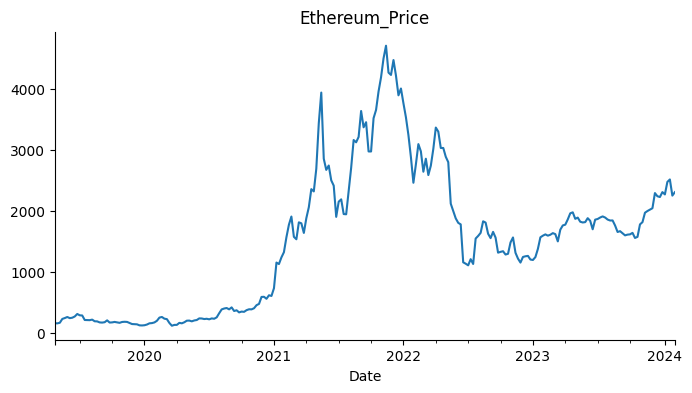

In [ ]:
# @title Ethereum_Price

from matplotlib import pyplot as plt
combined_weekly_data['Ethereum_Price'].plot(kind='line', figsize=(8, 4), title='Ethereum_Price')
plt.gca().spines[['top', 'right']].set_visible(False)

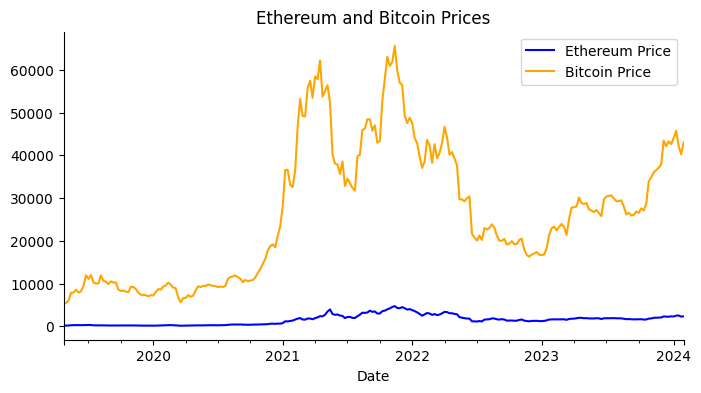

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and an axes object
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the first dataset with a label and color
combined_weekly_data['Ethereum_Price'].plot(kind='line', ax=ax, color='blue', label='Ethereum Price')

# Plot the second dataset with a label and color
combined_weekly_data['Bitcoin_Price'].plot(kind='line', ax=ax, color='orange', label='Bitcoin Price')

# Set the title and hide the top and right spines
ax.set_title('Ethereum and Bitcoin Prices')
ax.spines[['top', 'right']].set_visible(False)

# Add a legend
ax.legend()

# Show the plot
plt.show()

# 2) Formulating a Hypothesis & Hypothesis Testing:

Null Hypothesis (H0): There is no correlation between Bitcoin/Ethereum Price and Bitcoin/Ethereum Popularity Index.

Alternative Hypothesis (H1): There is a correlation between Bitcoin/Ethereum Price and Bitcoin/Ethereum Popularity Index.

To test this hypothesis, we can use a statistical test such as Pearson's correlation test, given the data appears to be normally distributed based on the visual analysis, and we're interested in testing for a linear relationship.

The external data is weekly and our given data is daily so we need to convert daily information to weekly to merge different data in the same dataframe. For price we will take median and for Volume we will get sum of the volume in that week.

Hypothesis Testing Results: Results of the Pearson's correlation tests.

In [ ]:
# Aggregate Bitcoin prices on a weekly basis using the mean
weekly_data = data['Bitcoin_Price'].resample('W').mean()

# Aggregate Ethereum prices on a weekly basis using the mean
weekly_ethereum_data = data['Ethereum_Price'].resample('W').mean()

# Filter the Ethereum weekly data starting from April 28, 2019
filtered_weekly_ethereum_data = weekly_ethereum_data[weekly_ethereum_data.index >= "2019-04-28"]

# Filter the weekly data starting from April 28, 2019
filtered_weekly_data = weekly_data[weekly_data.index >= "2019-04-28"]

# Combine the Bitcoin and Ethereum weekly data into one DataFrame
combined_weekly_data = pd.DataFrame({
    "Bitcoin_Price": filtered_weekly_data,
    "Ethereum_Price": filtered_weekly_ethereum_data
})



In [ ]:
# Load the dataset
data_path_v = '/content/drive/MyDrive/Colab Notebooks/cs210/Stock Market Dataset.csv'
data_v = pd.read_csv(data_path_v)

# Convert 'Date' to datetime format and set it as the index
data_v['Date'] = pd.to_datetime(data_v['Date'], format='%d-%m-%Y')
data_v.set_index('Date', inplace=True)

# Resample Bitcoin and Ethereum volume data separately to weekly totals
weekly_bitcoin_volume = data_v['Bitcoin_Vol.'].resample('W').sum()
weekly_ethereum_volume = data_v['Ethereum_Vol.'].resample('W').sum()

# Filter the weekly data starting from April 28, 2019
start_date = pd.to_datetime("2019-04-28")
weekly_bitcoin_volume = weekly_bitcoin_volume[weekly_bitcoin_volume.index >= start_date]
weekly_ethereum_volume = weekly_ethereum_volume[weekly_ethereum_volume.index >= start_date]

# Combine the Bitcoin and Ethereum weekly volume data into one DataFrame
combined_weekly_crypto_volume = pd.DataFrame({
    "Bitcoin_Volume": weekly_bitcoin_volume,
    "Ethereum_Volume": weekly_ethereum_volume
})


In [ ]:
# Convert the data type of the 'Date' column in data_semicolon to datetime64[ns]
data_semicolon['Date'] = data_semicolon['Date'].astype('datetime64[ns]')

# Merge the two dataframes on the 'Date' column
combined_with_pop = pd.merge(data_semicolon, combined_weekly_data, on='Date')

ethereum_popularity_data['Date'] = pd.to_datetime(ethereum_popularity_data['Date'])

# Merging the DataFrames on 'Date'
merged_data = pd.merge(combined_with_pop, ethereum_popularity_data, on='Date', how='outer')

# Display the merged DataFrame

merged_data.at[0, 'Date'] = pd.Timestamp('2019-04-28')

merged_data.dropna()
merged_data = pd.merge(combined_weekly_crypto_volume, merged_data, on='Date', how='outer')
merged_data=merged_data.iloc[2:251]
merged_data.to_csv('merged_data_fix.csv')



In [ ]:

ethereum_popularity_data['Date'] = pd.to_datetime(ethereum_popularity_data['Date'])

# Merging the DataFrames on 'Date'
merged_data = pd.merge(combined_with_pop, ethereum_popularity_data, on='Date', how='outer')

# Display the merged DataFrame

merged_data.at[0, 'Date'] = pd.Timestamp('2019-04-28')

merged_data.dropna()
merged_data = pd.merge(combined_weekly_crypto_volume, merged_data, on='Date', how='outer')
merged_data=merged_data.iloc[2:251]
merged_data.to_csv('merged_data_fix.csv')

merged_data.head()


,Date,Bitcoin_Volume,Ethereum_Volume,Popularity_Index,Bitcoin_Price,Ethereum_Price,Ethereum_popularity_index
2,2019-05-05,3859110.0,46360000.0,14.0,5440.120,161.326,5.0
3,2019-05-12,4176300.0,60710000.0,23.0,6032.480,171.344,8.0
4,2019-05-19,6270000.0,97940000.0,17.0,7839.300,234.146,6.0
5,2019-05-26,4268700.0,56590000.0,19.0,7870.700,248.534,6.0
6,2019-06-02,18091610.0,58830000.0,16.0,8548.575,265.575,5.0


In [ ]:
# Convert 'Date' column to datetime type
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Calculate the correlation matrix for all numerical variables
correlation_matrix = merged_data.corr()

correlation_matrix


,Date,Bitcoin_Volume,Ethereum_Volume,Popularity_Index,Bitcoin_Price,Ethereum_Price,Ethereum_popularity_index
Date,1.000000,0.053609,-0.003889,0.078348,0.470797,0.560506,0.208106
Bitcoin_Volume,0.053609,1.000000,0.948256,0.028506,0.132246,0.163784,0.093514
Ethereum_Volume,-0.003889,0.948256,1.000000,-0.002575,0.052908,0.064034,0.041119
Popularity_Index,0.078348,0.028506,-0.002575,1.000000,0.647938,0.490658,0.836052
Bitcoin_Price,0.470797,0.132246,0.052908,0.647938,1.000000,0.912861,0.785983
Ethereum_Price,0.560506,0.163784,0.064034,0.490658,0.912861,1.000000,0.738135
Ethereum_popularity_index,0.208106,0.093514,0.041119,0.836052,0.785983,0.738135,1.000000


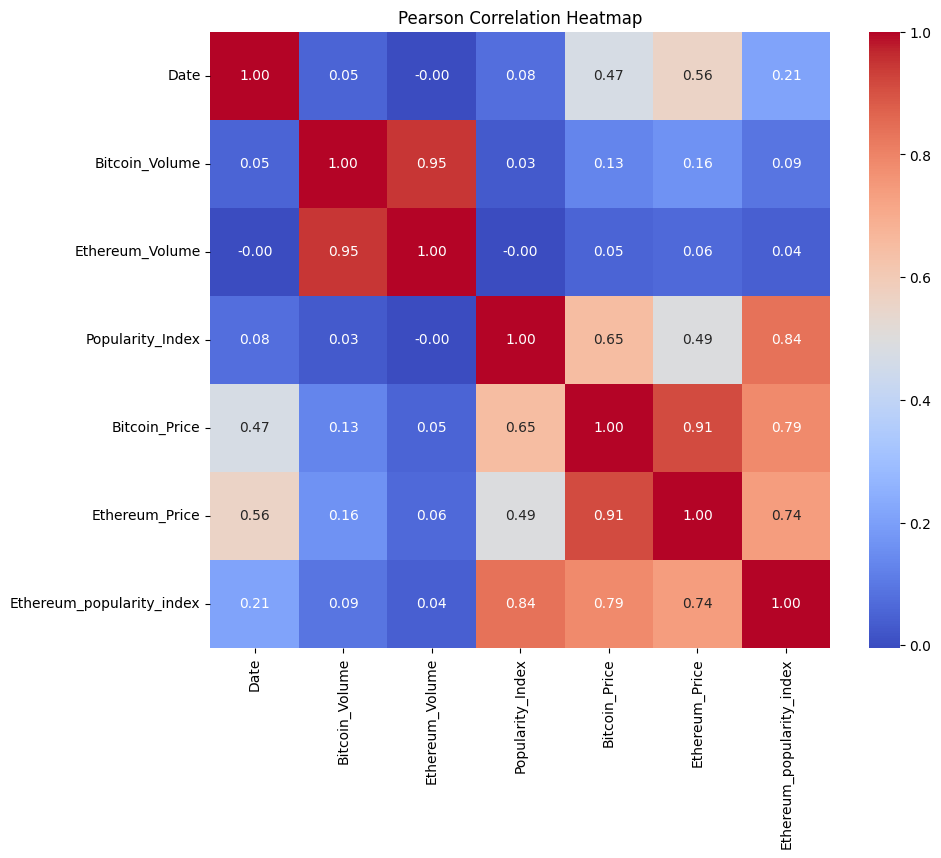

In [ ]:
# Create a heatmap for the correlation matrix
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Pearson Correlation Heatmap')
plt.show()

# P-Value Testing

In [ ]:
# Calculate the Pearson correlation coefficient and p-value
import scipy.stats as stats
Bitcoin_Price = merged_data['Bitcoin_Price']
Popularity_Index = merged_data['Popularity_Index']
correlation_coefficient_btc, p_value_btc = stats.pearsonr(Bitcoin_Price, Popularity_Index)
correlation_coefficient_btc, p_value_btc


(0.6479379726623282, 4.9080193650186975e-31)

In [ ]:
Bitcoin_Price = merged_data['Ethereum_Price']
Popularity_Index = merged_data['Ethereum_popularity_index']
correlation_coefficient_btc, p_value_btc = stats.pearsonr(Bitcoin_Price, Popularity_Index)
correlation_coefficient_btc, p_value_btc

(0.7381353753691646, 4.153213150450347e-44)

As p values are lower than 0.05 we can reject the null hypothesis and assume there is a correlation.


# 3) Single Linear Regression Model & Results

The ones with higher than 0.50 correlation we can accept there is possitive correlation and in order to show it we will use scatter plot and take linear regression


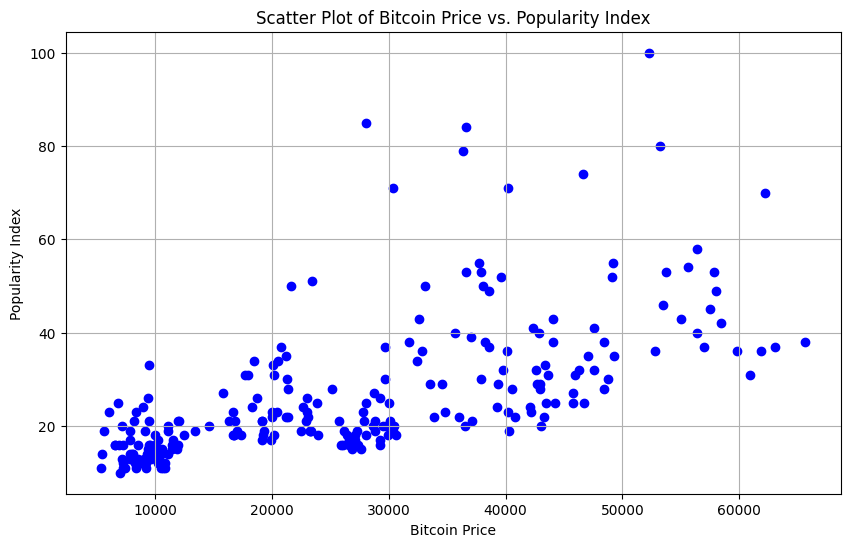

In [ ]:
# Create a scatter plot to visualize the correlation between Bitcoin_Price and Popularity_Index
plt.figure(figsize=(10, 6))
plt.scatter(combined_with_pop['Bitcoin_Price'],combined_with_pop['Popularity_Index'], color='blue')
plt.title('Scatter Plot of Bitcoin Price vs. Popularity Index')
plt.xlabel('Bitcoin Price')
plt.ylabel('Popularity Index')
plt.grid(True)
plt.show()

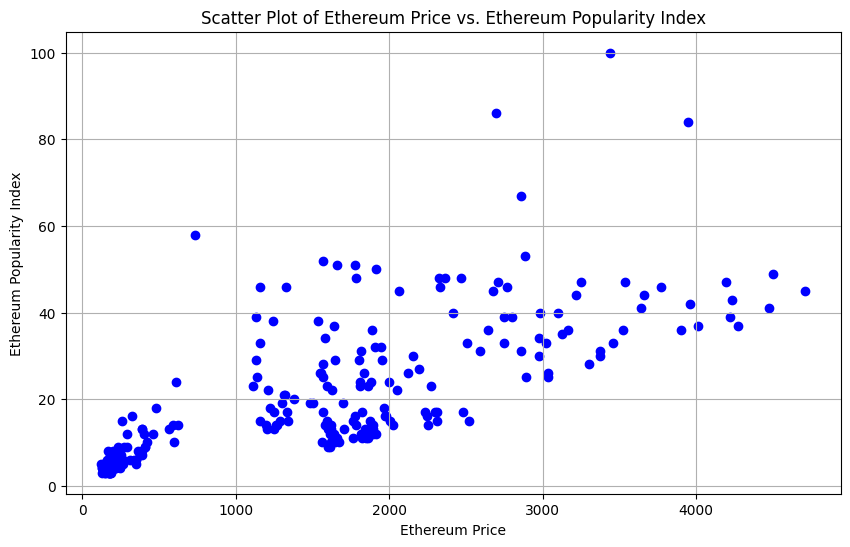

In [ ]:
# Create a scatter plot to visualize the correlation between Bitcoin_Price and Popularity_Index
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Ethereum_Price'],merged_data['Ethereum_popularity_index'], color='blue')
plt.title('Scatter Plot of Ethereum Price vs. Ethereum Popularity Index')
plt.xlabel('Ethereum Price')
plt.ylabel('Ethereum Popularity Index')
plt.grid(True)
plt.show()

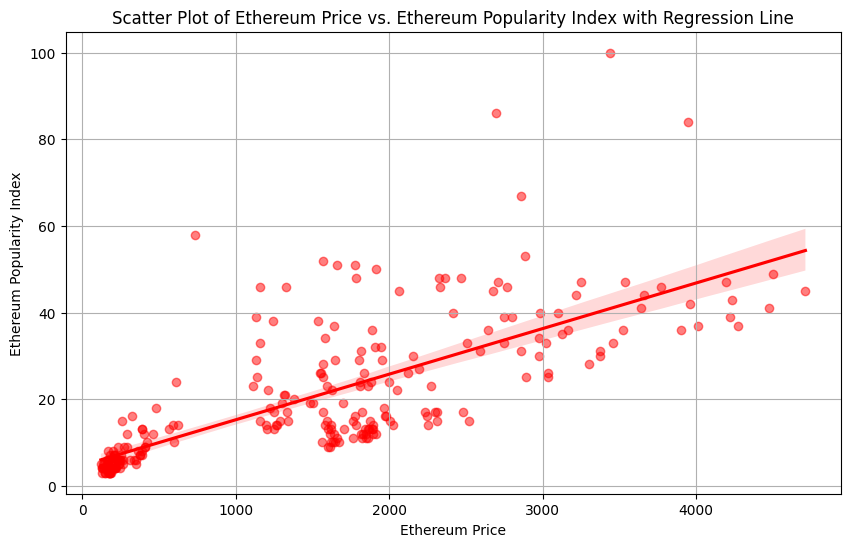

Intercept: 4.683239218147202
Slope: 0.010533648181041294
R-squared: 0.5448438323713777
Mean Squared Error (MSE): 121.85935916125648
Mean Absolute Error (MAE): 7.2995090408957894
Standard Error of Slope: 0.0006101313378216208
t-Statistic: 17.264558510713528
p-value: 0.0


In [ ]:

plt.figure(figsize=(10, 6))

# Using seaborn to plot the scatter plot and fit the regression line
sns.regplot(x='Ethereum_Price', y='Ethereum_popularity_index', data=merged_data, color='red', scatter_kws={'alpha':0.5})

plt.title('Scatter Plot of Ethereum Price vs. Ethereum Popularity Index with Regression Line')
plt.xlabel('Ethereum Price')
plt.ylabel('Ethereum Popularity Index')
plt.grid(True)
plt.show()


import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Reshaping data and fitting the model
X = merged_data['Ethereum_Price'].values.reshape(-1, 1)
y = merged_data['Ethereum_popularity_index'].values

model = LinearRegression().fit(X, y)


# Calculating SSX
X_mean = np.mean(X)
SSX = np.sum((X - X_mean)**2)
# Standard Error of the slope
mse = mean_squared_error(y, model.predict(X))
se_slope = np.sqrt(mse / SSX)

# Calculating the t-Statistic for the slope
t_statistic = model.coef_[0] / se_slope

# Degrees of freedom
df = len(y) - 2

# Calculating the p-value
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df))

# Intercept and slope
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])

# R-squared
r_squared = model.score(X, y)
print("R-squared:", r_squared)

# Predictions for MSE and MAE
predictions = model.predict(X)
mse = mean_squared_error(y, predictions)
mae = mean_absolute_error(y, predictions)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Standard Error of Slope:", se_slope)
print("t-Statistic:", t_statistic)
print("p-value:", p_value)


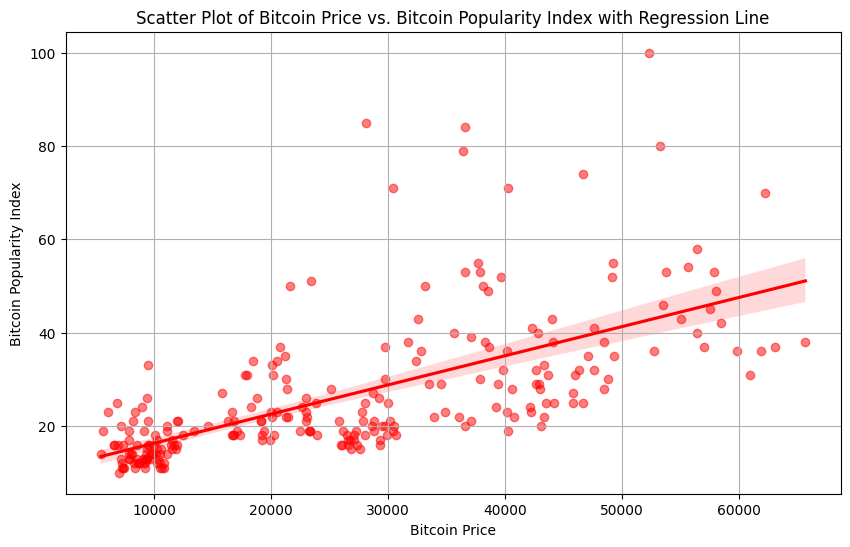

Intercept: 10.077961210198879
Slope: 0.000624850309549483
R-squared: 0.4198236164177678
Mean Squared Error (MSE): 131.8704303857044
Mean Absolute Error (MAE): 7.583835956493985


In [ ]:
plt.figure(figsize=(10, 6))

# Using seaborn to plot the scatter plot and fit the regression line
sns.regplot(x='Bitcoin_Price', y='Popularity_Index', data=merged_data, color='red', scatter_kws={'alpha':0.5})

plt.title('Scatter Plot of Bitcoin Price vs. Bitcoin Popularity Index with Regression Line')
plt.xlabel('Bitcoin Price')
plt.ylabel('Bitcoin Popularity Index')
plt.grid(True)
plt.show()


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Reshaping data and fitting the model
X = merged_data['Bitcoin_Price'].values.reshape(-1, 1)
y = merged_data['Popularity_Index'].values

model = LinearRegression().fit(X, y)

# Intercept and slope
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])

# R-squared
r_squared = model.score(X, y)
print("R-squared:", r_squared)

# Predictions for MSE and MAE
predictions = model.predict(X)
mse = mean_squared_error(y, predictions)
mae = mean_absolute_error(y, predictions)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)



As we assume, There is a correlation between Bitcoin/Ethereum Price and their popularity index. The thing that made me surprise is there is no correlation between popularity index and volume

#4) STEP 3: BUILDING ML MODELS
From other features, we will try to guess bitcoin price, our features are bitcoin volume, bitcoin popularity index, ethereum price, ethereum volume, ethereum popularity index. Label is bitcoin price. We will focus on random forest and kNN models.

In [ ]:
# @title RANDOM FOREST
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

random_forest_data = merged_data.drop(['Date'], axis=1)

# Splitting data into features and target
X = random_forest_data.drop('Bitcoin_Price', axis=1)
y = random_forest_data['Bitcoin_Price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test_scaled)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2_rd = r2_score(y_test, y_pred)

mse, rmse, r2_rd
print("R^2 Value for initial Random Forest model:", r2_rd)
print("RMSE Value for initial Random Forest model:", rmse)
print("MSE Value for initial Random Forest model:", mse)

R^2 Value for initial Random Forest model: 0.8510347410690668
RMSE Value for initial Random Forest model: 5324.505503488495
MSE Value for initial Random Forest model: 28350358.856679276


# CROSS-VALIDATION FOR RANDOM FOREST MODEL

In [ ]:
from sklearn.model_selection import cross_val_score

# Define the Random Forest model
rf_cv = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation using negative mean squared error as scoring
cv_scores_mse = cross_val_score(rf_cv, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive mean squared error and calculate RMSE for each fold
cv_rmse = (-cv_scores_mse) ** 0.5

# Calculate mean and standard deviation of RMSE across all folds
cv_rmse_mean = cv_rmse.mean()
cv_rmse_std = cv_rmse.std()

# Perform 5-fold cross-validation using R^2 as the scoring metric
cv_scores_r2 = cross_val_score(rf_cv, X_train_scaled, y_train, cv=5, scoring='r2')

# Calculate mean and standard deviation of R^2 across all folds
cv_r2_mean = cv_scores_r2.mean()
cv_r2_std = cv_scores_r2.std()

print(" Array of cross-validation(cv=5) R^2 scores: ")

cv_scores_r2

print(f"Mean R^2: {cv_r2_mean:.4f} +/- {cv_r2_std:.4f}")


 Array of cross-validation(cv=5) R^2 scores: 
Mean R^2: 0.9284 +/- 0.0401


CV INCREASED THE ACCURACY

In [ ]:
# @title kNN
knn_data = merged_data.drop(['Date'], axis=1)
# Separate features and target variable
X = knn_data.drop(columns=['Bitcoin_Price'])
y = knn_data['Bitcoin_Price']
# Normalize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

# Initialize the KNN regressor
knn = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

mse, mae

# Calculate the R^2 score
r2_knn = r2_score(y_test, y_pred)
print("R^2 Value for initial kNN model:", r2_knn)


R^2 Value for initial kNN model: 0.8512710890265847


# HYPERPARAMETER TUNING: LOOKING FOR THE BEST K VALUE FOR kNN MODEL IN A LOOP


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the range of k values to test
k_range = range(1, 30)

# Initialize lists to store the performance metrics for each k
mse_values = []
mae_values = []
r2_values_k = []

# Loop over the range of k values
for k in k_range:
    # Initialize the KNN regressor with the current k
    knn = KNeighborsRegressor(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Predict on the test set
    y_pred = knn.predict(X_test)

    # Calculate the performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the performance metrics
    mse_values.append(mse)
    mae_values.append(mae)
    r2_values_k.append(r2)

# Find the k with the best performance (e.g., lowest MSE)
best_k_mse = k_range[mse_values.index(min(mse_values))]
best_k_r2 = k_range[r2_values_k.index(max(r2_values_k))]

# Print the results
print("MSE values for each k:", mse_values)
print("MAE values for each k:", mae_values)
print("R^2 values for each k:", r2_values_k)
print("Best k value based on MSE:", best_k_mse)
print("Best k value based on R^2:", best_k_r2)
print("Best R^2 Value:",max(r2_values_k))

MSE values for each k: [34285045.57157699, 30377434.19395234, 29465220.117111668, 30831475.379148852, 28305378.238656253, 29400404.184646625, 28462089.121379033, 29500521.71155042, 25976218.455754474, 25307511.69988888, 25148507.032150317, 23802782.784442082, 22757212.97525399, 22836161.45805267, 22240672.658295117, 23038402.806116655, 24367232.849761076, 25074893.888116427, 26114767.491139043, 25865435.893678494, 25808661.34586901, 25290421.791413512, 26440554.959285244, 26864785.988822613, 27344478.201305453, 28003164.676021114, 27663705.264219068, 28337886.692082938, 28248196.00876663]
MAE values for each k: [3444.2205333333336, 3157.8938166666667, 3592.6401888888886, 3616.332966666667, 3526.651733333334, 3582.7975777777783, 3556.693904761905, 3654.855145833333, 3518.7054444444443, 3581.4934199999993, 3633.1579696969693, 3568.043497222222, 3590.0872410256416, 3604.2508785714285, 3577.784628888889, 3553.5187520833333, 3683.583223529412, 3715.749740740741, 3767.7776385964903, 3743.056

THE BEST VALUE IS 15


# BEST K VALUE PARAMETER GRAPH

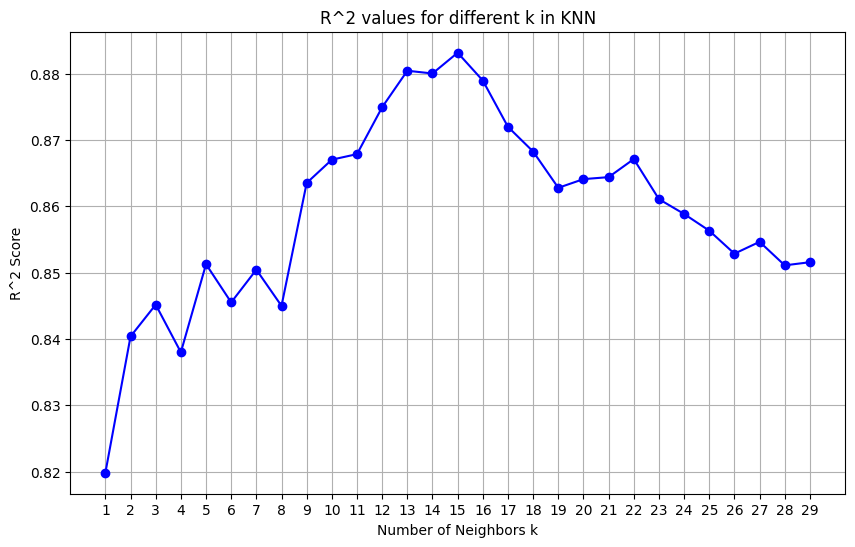

In [ ]:
# Plot the R^2 values
plt.figure(figsize=(10, 6))
plt.plot(k_range, r2_values, marker='o', linestyle='-', color='b')
plt.title('R^2 values for different k in KNN')
plt.xlabel('Number of Neighbors k')
plt.ylabel('R^2 Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()

CHECKING IF CROSS-VALIDATION AFFECT ACCURACY

In [ ]:
from sklearn.model_selection import cross_val_score

# Initialize the KNN regressor
knn_cv = KNeighborsRegressor(n_neighbors=15)

# Define the number of folds
num_folds = 5

# Perform cross-validation for MSE
scores_mse = cross_val_score(knn_cv, X_scaled, y, cv=num_folds, scoring='neg_mean_squared_error')
mean_mse = -scores_mse.mean()  # Negate to get positive values (scikit-learn returns negative MSE)

# Perform cross-validation for MAE
scores_mae = cross_val_score(knn_cv, X_scaled, y, cv=num_folds, scoring='neg_mean_absolute_error')
mean_mae = -scores_mae.mean()  # Negate to get positive values

# Perform cross-validation for R²
scores_r2 = cross_val_score(knn_cv, X_scaled, y, cv=num_folds, scoring='r2')
mean_r2 = scores_r2.mean()

print("Mean MSE: {}".format(mean_mse))
print("Mean MAE: {}".format(mean_mae))
print("Mean R2: {}".format(mean_r2))


Mean MSE: 77763732.58128063
Mean MAE: 6661.68435481179
Mean R2: -0.5422002833292046


CV IS NOT INCREASING THE ACCURACY EVEN IT GOES MINUS

-While the initial performance of the KNN model appears good, the lower R² score after cross-validation suggests that it performs poorly when generalized to new data. This stark difference might indicate overfitting in the initial evaluation or our data set is so volatile and KNN is sensitive to the scale of the features. Features with larger ranges of values can dominate the distance calculation, affecting the model's performance unless scaled properly.

# COMPARING MODELS PERFOMANCE

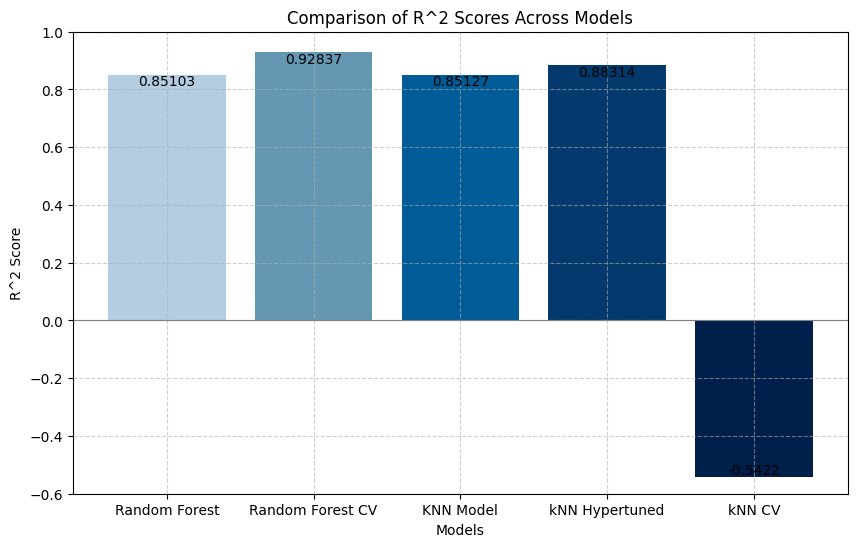

In [ ]:
import matplotlib.pyplot as plt

# Define the model names and R^2 scores
model_names = ['Random Forest', 'Random Forest CV', 'KNN initial', 'kNN Hypertuned', 'kNN CV']
r2_scores = [r2_rd, cv_r2_mean, r2_knn, max(r2_values_k), mean_r2]

# Define a gradient of blues for color consistency
colors = ['#b3cde3', '#6497b1', '#005b96', '#03396c', '#011f4b']

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, r2_scores, color=colors)
plt.xlabel('Models')
plt.ylabel('R^2 Score')
plt.title('Comparison of R^2 Scores Across Models')
plt.ylim(-0.6, 1)  # Adjust y-axis limits to include the full range

# Add a line at zero to highlight the baseline
plt.axhline(0, color='grey', linewidth=0.8)

# Adding the text labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 5), va='bottom' if yval < 0 else 'top', ha='center')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()